<a href="https://colab.research.google.com/github/Diwash17/Natural-Language-Proccesing/blob/main/spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data loading by reading csv file

In [ ]:
url= 'https://raw.githubusercontent.com/Diwash17/Email-classifier/main/emails.csv'
df=pd.read_csv(url)

In [ ]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.shape

(5728, 2)

In [ ]:
df.isnull().sum()

,0
text,0
spam,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df['spam'].value_counts()

,count
spam,
0,4360
1,1368


In [ ]:
ham=df[df['spam']==0]


In [ ]:
spam=df[df['spam']==1]

In [ ]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [ ]:
spam_percentage=(len(spam)/len(df))*100

In [ ]:
print(f'spam percentage is {spam_percentage} %')

spam percentage is 23.88268156424581 %


In [ ]:
ham_percentage=(len(ham)/len(df))*100

In [ ]:
print(f'ham_percentage is {ham_percentage} %')

ham_percentage is 76.11731843575419 %


Feature extraction by using countvectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer= CountVectorizer()

In [ ]:
spamham_countVectorizer=vectorizer.fit_transform(df['text'])

In [ ]:
spamham_countVectorizer.shape

(5728, 37303)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
label=df['spam']
X=spamham_countVectorizer
y=label


In [ ]:
X.shape

(5728, 37303)

In [ ]:
y.shape

(5728,)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clr = LogisticRegression()

In [ ]:
clr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clr.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.9886561954624782

In [ ]:
report_card = classification_report(y_test,y_pred)
report_card

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99       856\n           1       0.99      0.97      0.98       290\n\n    accuracy                           0.99      1146\n   macro avg       0.99      0.98      0.98      1146\nweighted avg       0.99      0.99      0.99      1146\n'

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[853,   3],
       [ 10, 280]])

<Axes: >

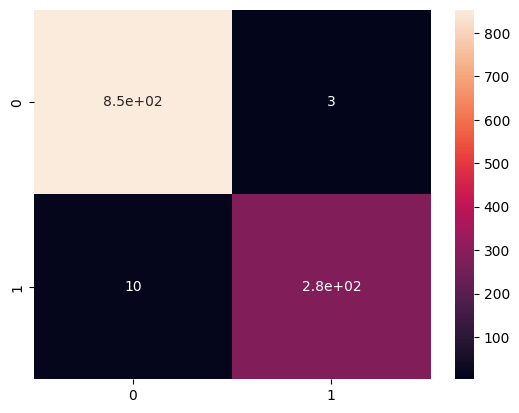

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB_classifier=MultinomialNB()


In [ ]:
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_pred=NB_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
cm=confusion_matrix(y_test,y_predict_test)

<Axes: >

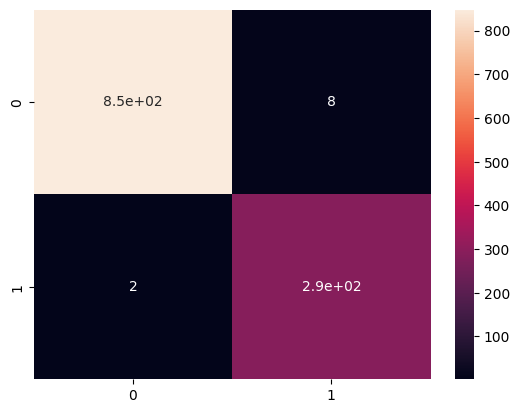

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
accuracy = accuracy_score(y_test,y_predict_test)
accuracy

0.9912739965095986

In [ ]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       856
           1       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [ ]:
import pickle

In [ ]:
with open('spam_classifier_model1.pkl', 'wb') as model_file:
    pickle.dump(clr, model_file)

with open('count_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [ ]:
with open('spam_classifier_model1.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('count_vectorizer.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)

In [ ]:
with open('spam_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(NB_classifier, model_file)

with open('count_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [ ]:
with open('spam_classifier_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('count_vectorizer.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)

In [ ]:
new_email = ["Subject:Congratulations! You’ve won a $1,000 gift card. Claim now!”"]

# Vectorizing the new email using the same vectorizer
new_email_vectorized = vectorizer.transform(new_email)

# Predicting with the trained model
prediction = NB_classifier.predict(new_email_vectorized)

# Outputting the result
if prediction[0] == 1:
    print("The email is classified as Spam.")
else:
    print("The email is classified as Ham.")

The email is classified as Spam.


In [ ]:
new_email_input = input("Enter the email to check its spam or not")

new_email = [new_email_input]
# Vectorizing the new email using the same vectorizer
new_email_vectorized = vectorizer.transform(new_email)

# Predicting with the trained model
prediction = clr.predict(new_email_vectorized)

# Outputting the result
if prediction[0] == 1:
    print("The email is classified as Spam.")
else:
    print("The email is classified as Ham.")

Enter the email to check its spam or notyou won $5000 now pay $500 to get prize money
The email is classified as Spam.


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [145]:
import streamlit as st